#  <div align=center> Customer Segmentation using Data Science 

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv(r"D:\ML_Files\CustomerSegmentation\Customers_of_Mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Information/Explaination about the dataset

#### This dataset is used in retail and marketing analytics to understand customer behavior and preferences. It includes the following types of information:

##### Customer ID

##### Gender

##### Age

##### Annual Income

##### Spending Score

 A "customer ID" (Customer Identification) is a unique identifier assigned to each customer in a database or system. It is used to distinguish one customer from another and track their activities, purchases, interactions, and other relevant information.

 Gender is one of the key factors in segmenting customers into distinct groups. For example, stores may tailor their product offerings and marketing strategies differently for male and female customers.

 Age is a fundamental factor for segmenting customers into groups. Different age groups may have distinct preferences, shopping behaviors, and income levels. For example, retailers often distinguish between teenagers, young adults, middle-aged individuals, and seniors.

 The annual income of mall customers is a crucial demographic variable that helps businesses and mall operators understand the spending capacity and shopping preferences of their customer base.

 Spending score is a metric used to assess and quantify a customer's purchasing behavior within a mall. 

### Data Preprocessing

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


The dataset contains 5 columns:


-> CustomerID

-> Gender 

-> Age

-> Annual Income

-> Spending Score
    

In [4]:
df.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for null values in the data

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing values in the data.

In [6]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


There are no duplicate values in the data.



In [7]:
df.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

Shows the number of unique (different) values for a given attribute in the dataset

In [8]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

Before moving on further we will rename some columns to move along easily with further visualization.



In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

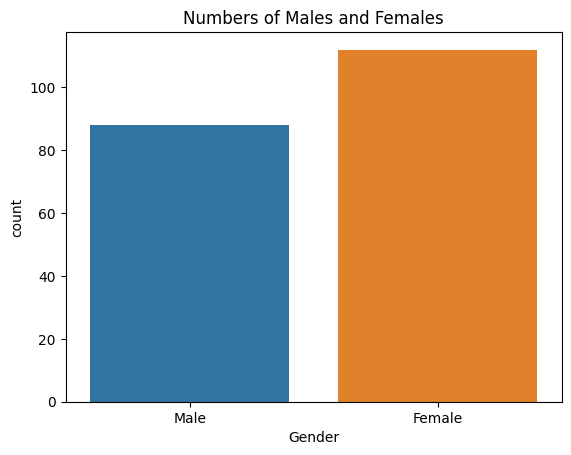

In [10]:
sns.countplot(x = 'Gender', data = df, hue = 'Gender')
plt.title("Numbers of Males and Females");

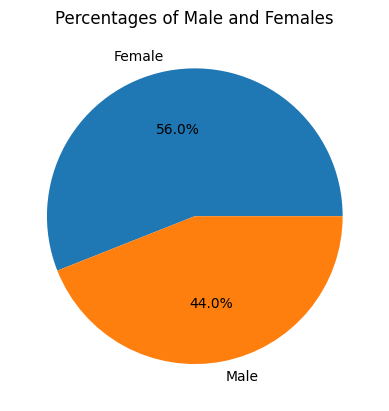

In [11]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

Inference: From the above countplot, piechart and also from values count function we can say that there are more females than a male in our dataset.

### Checking for Outliers in the dataset

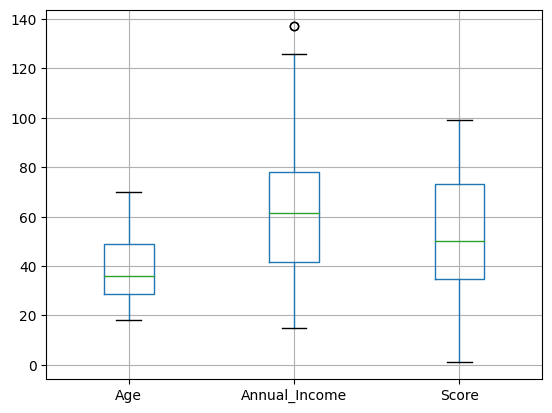

In [12]:
df.iloc[:,1:].boxplot();

As we can see that there is only one outlier present in the data. So no need to remove the outliers from the data.

### Distribution of values of attributes

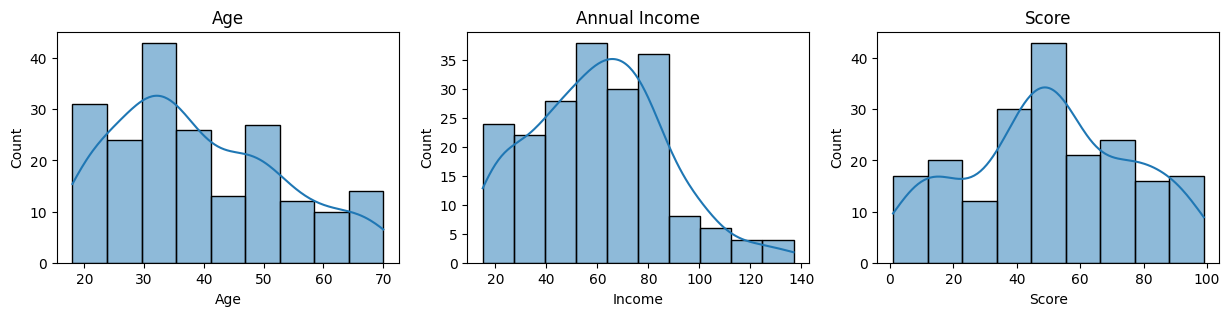

In [13]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score");

### Distribution of age with respect to gender

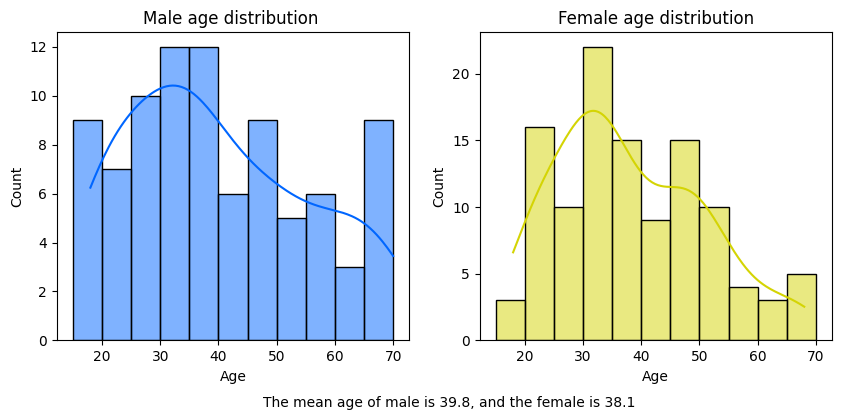

In [14]:
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"The mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

The average age of male is little bit higher than the feamale i.e (39.8 and 38.1).
Also we can see that the distribution of age in male is uniform than the female.

### Distribution of income with respect to gender

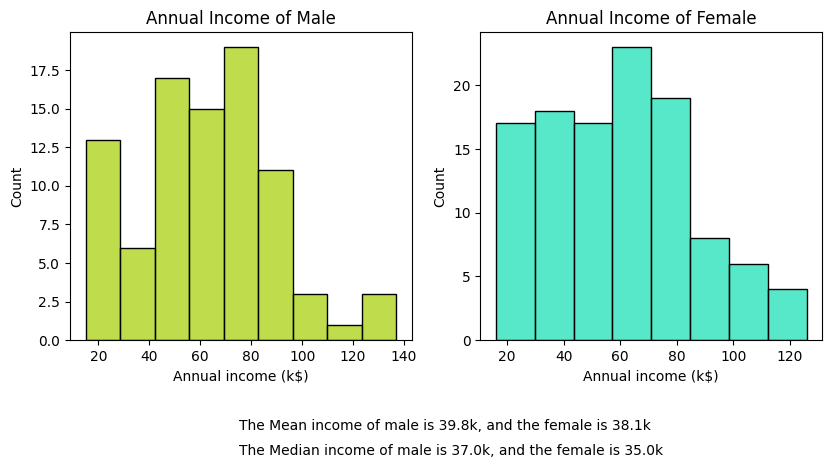

In [15]:
income_male = df[df.Gender == "Male"]["Annual_Income"]
income_female = df[df.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = '#A8D10E')
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female, color = '#1DE1B8')
plt.title("Annual Income of Female")
plt.xlabel("Annual income (k$)")
plt.text(-75,-7,f"The Mean income of male is {round(male.mean(),1)}k, and the female is {round(female.mean(),1)}k")
plt.text(-75,-9,f"The Median income of male is {round(male.median(),1)}k, and the female is {round(female.median(),1)}k")
plt.show()

We can see that the mean and the median of male income is slightly greater than female income.

### Distribution of spending score with respect to gender

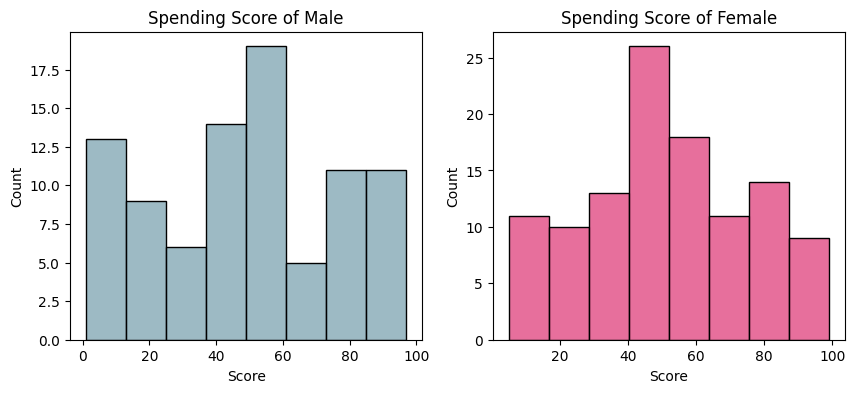

In [16]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B')
plt.title("Spending Score of Female")
plt.show()

We can see that the distribution of spending in female is uniform than male.

### Spending Score by age group

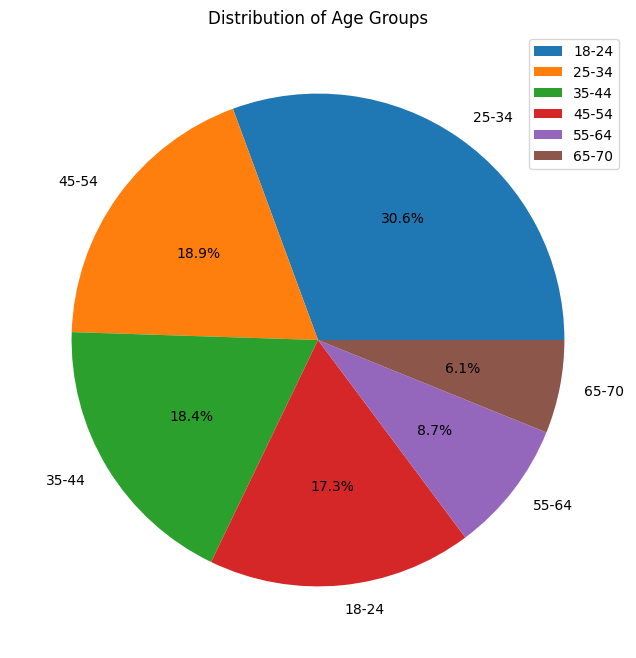

In [17]:

df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

### Calculating the mean spending score by age group

C:\Users\HP\AppData\Local\Temp\ipykernel_31756\885886067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')


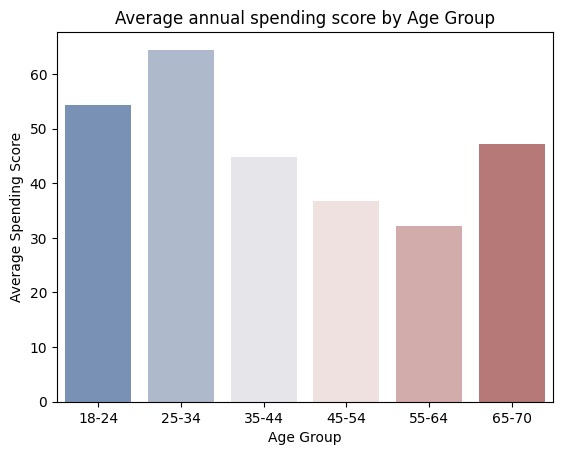

In [18]:

mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

The average spending score grouped by different age groups is calculated 

## K Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of predefined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

Cost Function: Inertia is a metric used to evaluate the quality of a clustering algorithm, particularly the K-means algorithm. It measures the sum of squared distances between each data point and its assigned centroid. In other words, it measures how far the data points are from their assigned cluster centers.

The K-means algorithm tries to minimize the inertia by iteratively updating the cluster centers until the inertia cannot be reduced any further. A lower inertia value indicates that the clusters are more compact and well-separated, while a higher inertia value indicates that the clusters are more spread out and overlapping.


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class PerformKMeans:
    def __init__(self, X):
        """
        Initializes the PerformKMeans object with the provided dataset.
        """
        self.X = X

    def get_cost_func(self, fit_cols, no_k=10):
        """
        Calculates the inertia (cost function) for different values of K (number of clusters).
        :param fit_cols: List of columns to use for fitting KMeans
        :param no_k: Maximum number of clusters to evaluate
        :return: List of inertia values
        """
        cost_function_values = []
        for k in range(1, no_k + 1):
            km = KMeans(
                n_clusters=k, init="k-means++", max_iter=100, n_init=10, random_state=9
            )
            dataset = self.X.loc[:, fit_cols]
            km.fit(dataset)
            cost_function_values.append(km.inertia_)
        return cost_function_values

    def elbow_plot(self, cols, knos=10):
        """
        Plots the elbow curve to determine the optimal number of clusters.
        :param cols: List of columns to fit the KMeans model
        :param knos: Number of clusters to evaluate
        """
        cost_function = self.get_cost_func(cols, knos)
        plt.figure(figsize=(7, 4))
        plt.title(f"Elbow plot for kmeans with {', '.join(cols)}")
        plt.plot(
            range(1, knos + 1), cost_function, marker="o", linewidth=2, markersize=5
        )
        plt.xlabel("Number of clusters")
        plt.ylabel("Cost function (Inertia)")
        plt.grid()
        plt.show()

    def plot_clusters(self, fit_cols, k=5):
        """
        Plots clusters for the given columns and number of clusters.
        :param fit_cols: List of two columns to fit KMeans and visualize
        :param k: Number of clusters
        """
        if len(fit_cols) != 2:
            raise ValueError(
                "Clusters can be plotted only for 2 features using this function"
            )

        km = KMeans(
            n_clusters=k, init="k-means++", max_iter=100, n_init=10, random_state=9
        )
        dataset = self.X.loc[:, fit_cols]
        labels = km.fit_predict(dataset)
        centers = km.cluster_centers_

        plt.figure(figsize=(8, 5))
        plt.title(f"Scatter plot for kmeans with {fit_cols[0]} vs {fit_cols[1]}")
        sns.scatterplot(
            x=self.X[fit_cols[0]], y=self.X[fit_cols[1]], hue=labels, palette="viridis"
        )
        plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100, label="Centroids")
        plt.legend()
        plt.show()

        return dataset, labels

    def evaluate_clustering(self, fit_cols, k=5):
        """
        Evaluates the clustering using inertia and silhouette score.
        :param fit_cols: List of columns to use for clustering
        :param k: Number of clusters
        """
        km = KMeans(
            n_clusters=k, init="k-means++", max_iter=100, n_init=10, random_state=42
        )
        dataset = self.X.loc[:, fit_cols]
        labels = km.fit_predict(dataset)
        centers = km.cluster_centers_
        inertia = km.inertia_
        sil_score = silhouette_score(dataset, labels)

        print(f"Inertia (Cost Function): {inertia}")
        print(f"Silhouette Score: {sil_score}")
        print(f"Cluster Centers:\n {centers}")

        return labels, centers

In [34]:
# Load your dataset
X = pd.read_csv(r"D:\ML_Files\CustomerSegmentation\Customers_of_Mall.csv")

# Initialize the PerformKMeans class with the dataset
pkm = PerformKMeans(X)

feature_set1 = ["Annual Income (k$)", "Spending Score (1-100)"]
feature_set2 = ["Age", "Annual Income (k$)"]
feature_set3 = ["Age", "Spending Score (1-100)"]

feature_set4 = X.columns.drop(["Gender"])

#### Plot clusters for different feature sets and evaluate

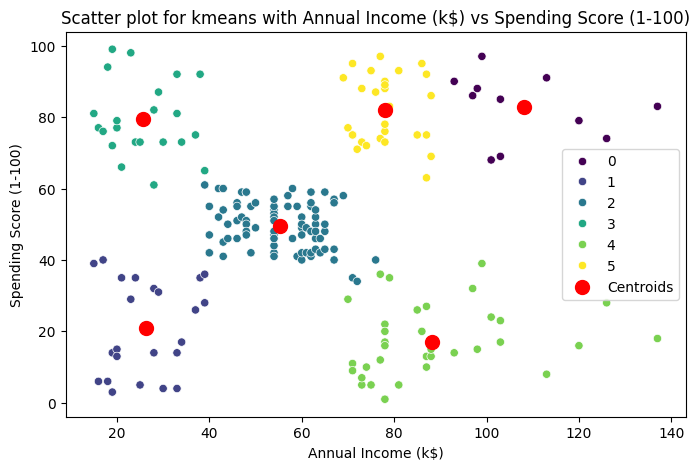

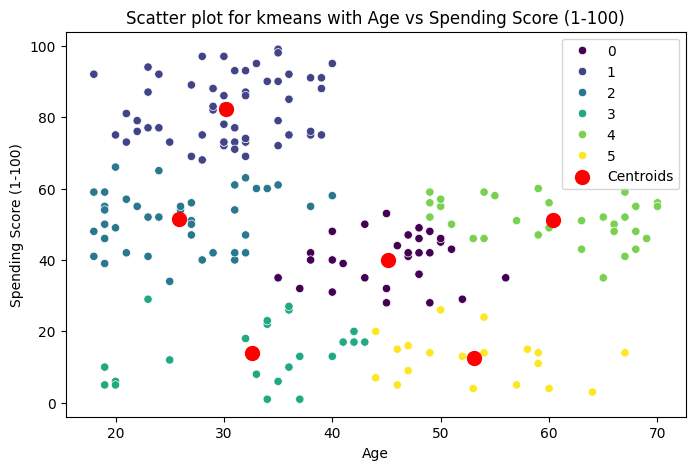

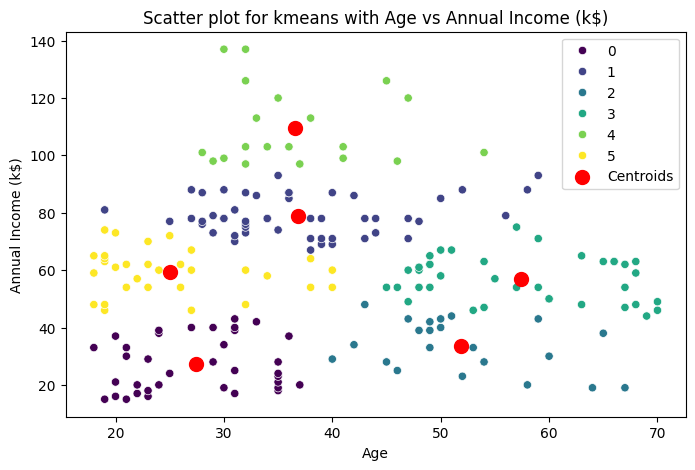

In [35]:

dataset1, labels1 = pkm.plot_clusters(feature_set1, k=6)
dataset2, labels2 = pkm.plot_clusters(feature_set3, k=6)
dataset3, labels3 = pkm.plot_clusters(feature_set2, k=6)

In [36]:
# Evaluate clustering for all features
labels, centers = pkm.evaluate_clustering(feature_set4, k=6)

Inertia (Cost Function): 122588.9065009219
Silhouette Score: 0.4102525919884779
Cluster Centers:
 [[ 68.09302326  46.23255814  48.60465116  50.65116279]
 [ 23.          45.2173913   26.30434783  20.91304348]
 [166.82352941  32.26470588  88.88235294  82.76470588]
 [ 24.          25.52173913  26.30434783  78.56521739]
 [111.41860465  38.18604651  64.48837209  50.93023256]
 [165.52941176  41.64705882  88.73529412  16.76470588]]


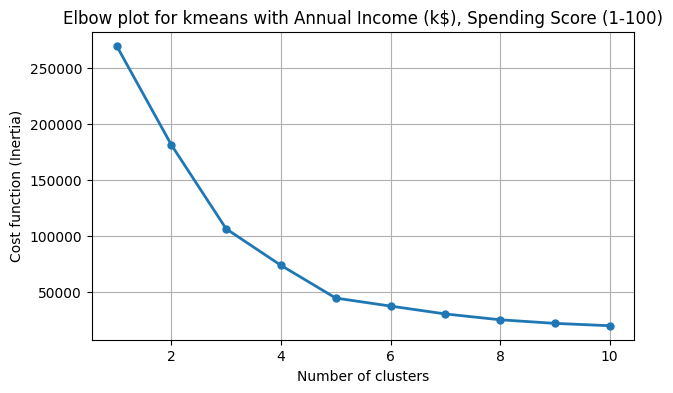

In [37]:
# Optionally, generate an elbow plot to find the optimal number of clusters
pkm.elbow_plot(feature_set1, knos=10)